In [17]:
import sys
sys.path.append('../scripts')
from sklearn.tree import DecisionTreeRegressor
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

decision_tree = DecisionTreeRegressor()

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



10-fold
Fitting 6 folds for each of 20736 candidates, totalling 124416 fits


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Mean MSE: 189.30035180948911
Mean MAE: 6.411880884343083
Mean R2: -1.5220032545352804
RMSE: 13.758646438130791


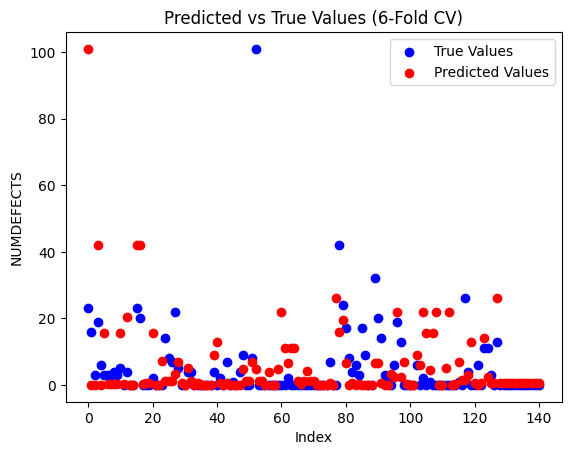

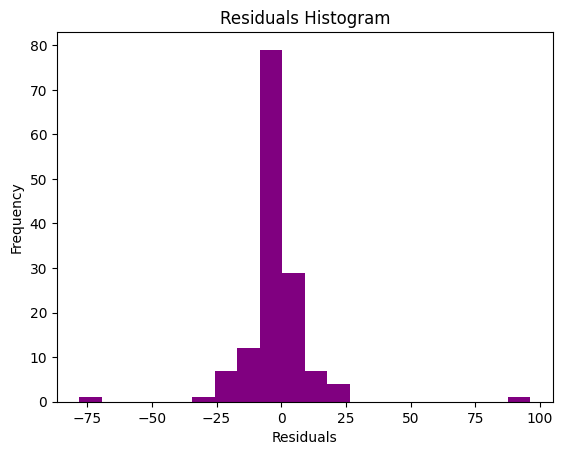

In [3]:
print('\n6-fold')
k_fold_results = k_fold_cv(X, y, decision_tree, 6, param_grid=param_grid)

In [3]:
best_hyperparameters = {
    'ccp_alpha': 0.0,
    'criterion': 'squared_error',
    'max_depth': 50,
    'max_features': 'auto',
    'max_leaf_nodes': 30,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'splitter': 'random'
}
decision_tree_tuned = DecisionTreeRegressor(**best_hyperparameters)

LOOCV


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

R squared (LOOCV): -0.3946747671423281
Average MSE (LOOCV): 161.5156041285608
Average RMSE (LOOCV): 12.708878948536759
Average MAE (LOOCV): 6.402568784124736


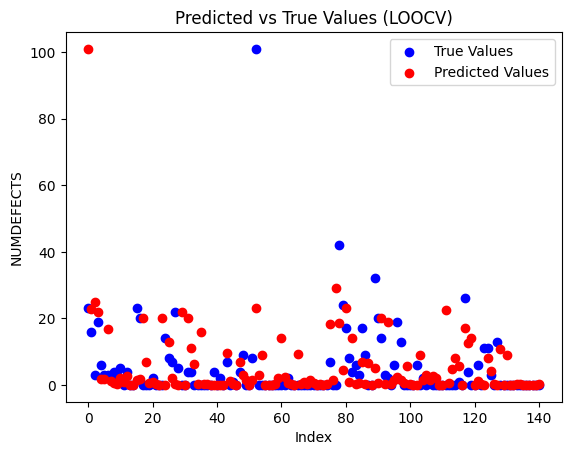

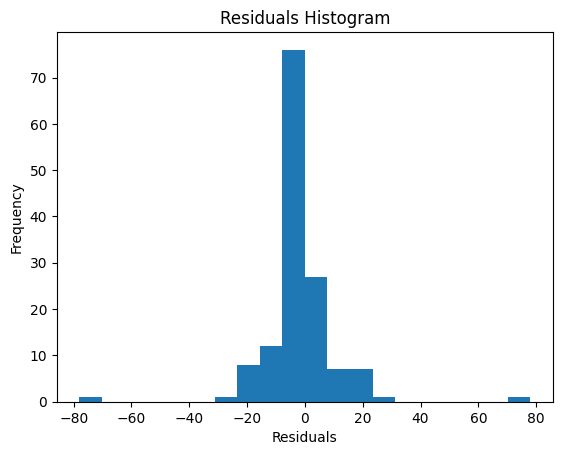

In [5]:
print('LOOCV')
loocv_results = loocv(X, y, decision_tree_tuned)

In [6]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric       LOOCV     10-Fold
0     R2   -0.394675   -1.522003
1    MSE  161.515604  189.300352
2   RMSE   12.708879   13.758646
3    MAE    6.402569    6.411881


LOOCV


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

R squared (LOOCV): -0.23529037119653862
Average MSE (LOOCV): 45.44881648290122
Average RMSE (LOOCV): 6.7415737393357364
Average MAE (LOOCV): 3.7628899952989827


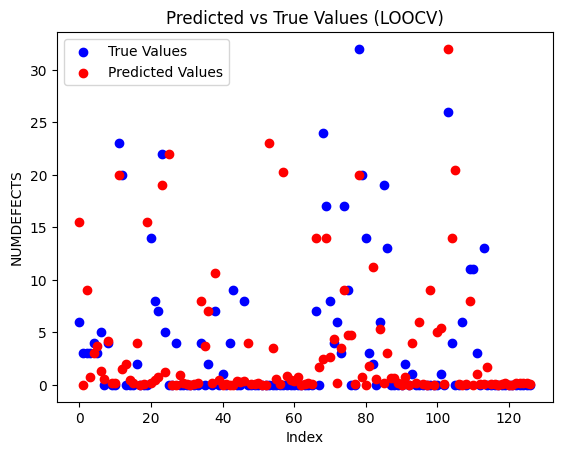

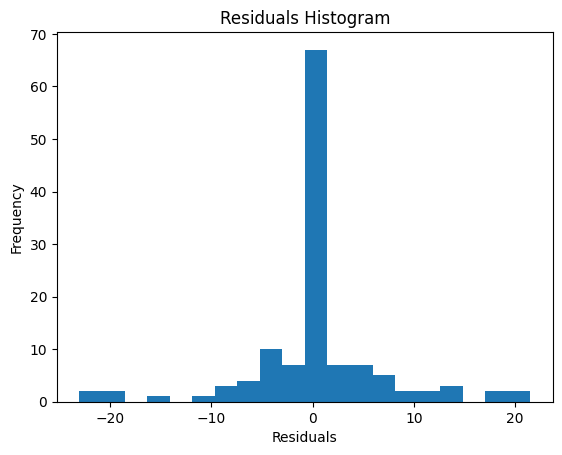


10-fold
Mean MSE: 44.64979412082756
Mean MAE: 3.6816723635100987
Mean R2: -0.33978459315932374
RMSE: 6.682050143543339


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

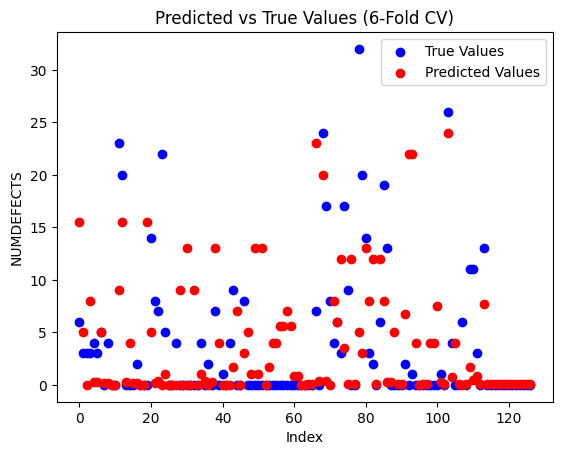

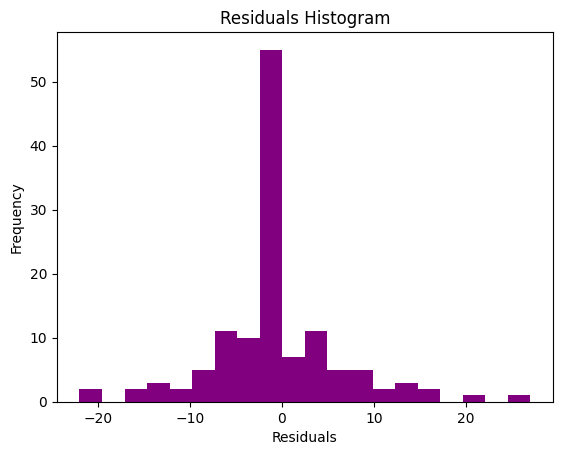

In [7]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, decision_tree_tuned)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, decision_tree_tuned, 6)

In [8]:
# Creating a comparison table
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '10-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV    10-Fold
0     R2  -0.235290  -0.339785
1    MSE  45.448816  44.649794
2   RMSE   6.741574   6.682050
3    MAE   3.762890   3.681672


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


                     Feature  Importance
89           sumNUM_OPERANDS    0.573002
91    sumNUM_UNIQUE_OPERANDS    0.122470
2   COUPLING_BETWEEN_OBJECTS    0.053330
86         sumHALSTEAD_LEVEL    0.045272
55           avgLOC_COMMENTS    0.035018
61    avgHALSTEAD_DIFFICULTY    0.034854
0           PERCENT_PUB_DATA    0.017977
68           avgNUM_OPERANDS    0.012464
42     maxHALSTEAD_ERROR_EST    0.011942
24     minHALSTEAD_PROG_TIME    0.011747
31              maxLOC_BLANK    0.011348
7                     FAN_IN    0.010717
65         avgHALSTEAD_LEVEL    0.009758
34           maxLOC_COMMENTS    0.007520
83        sumHALSTEAD_EFFORT    0.007461


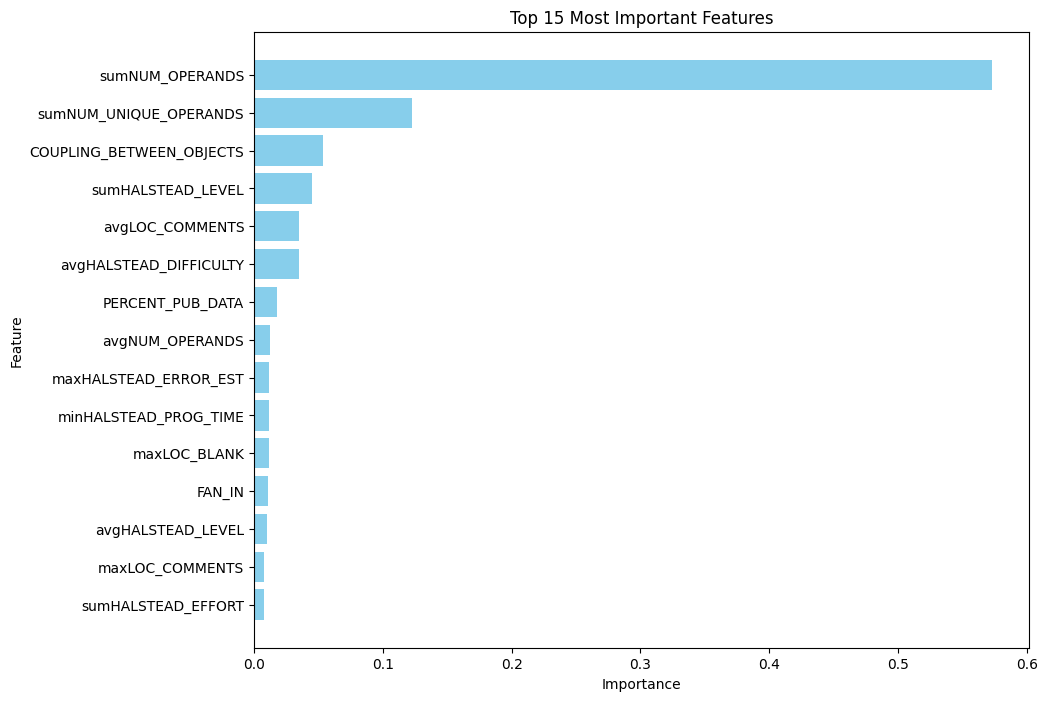

In [16]:
# Feature importance
decision_tree = DecisionTreeRegressor(**best_hyperparameters)

# Train the best model on the full dataset to get feature importances
decision_tree.fit(X, y)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Create a DataFrame for easy plotting
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_features_df = features_df.head(15)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
print(top_features_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('feature_importance_dtr.png')
plt.show()
